# Loan Prediction

This project aims to develop a classification model to predict the approval or rejection status of loan applications. The target variable column is Loan Status.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
df = pd.read_csv('LoansTrainingSet.csv')

In [3]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

In [5]:
df.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Years in current job', 'Home Ownership',
       'Annual Income', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [6]:
df.shape

(256984, 19)

In [7]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,2.569840e+05,195308.000000,1.953080e+05,256984.000000,116601.000000,256984.000000,256984.000000,2.569840e+05,256455.000000,256961.000000
mean,1.371331e+07,1251.116099,7.195272e+04,18.290195,34.881450,11.106267,0.156628,1.540656e+04,0.110316,0.027203
std,3.438131e+07,1762.016848,5.887757e+04,7.075747,21.854165,4.982982,0.460731,1.966506e+04,0.336229,0.245950
min,5.050000e+02,585.000000,0.000000e+00,3.400000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8.299000e+03,714.000000,4.432100e+04,13.500000,16.000000,8.000000,0.000000,5.974000e+03,0.000000,0.000000
50%,1.429800e+04,733.000000,6.124200e+04,17.000000,32.000000,10.000000,0.000000,1.107800e+04,0.000000,0.000000
75%,2.436700e+04,744.000000,8.646200e+04,21.700000,51.000000,14.000000,0.000000,1.931900e+04,0.000000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,11.000000,1.731412e+06,7.000000,11.000000


In [8]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

In [9]:
df['Years in current job'].value_counts()

Years in current job
10+ years    78896
2 years      23462
< 1 year     21012
3 years      20659
5 years      17864
1 year       16746
4 years      16166
6 years      14597
7 years      13968
8 years      12206
9 years       9932
Name: count, dtype: int64

In [10]:
df['Years in current job'].unique()

array(['10+ years', '4 years', '6 years', '5 years', nan, '3 years',
       '2 years', '< 1 year', '1 year', '7 years', '9 years', '8 years'],
      dtype=object)

In [11]:
df['Years in current job'] = df['Years in current job'].ffill().bfill()

In [12]:
df['Years in current job'] = df['Years in current job'].str.extract('(\d+)').astype('int32')

In [13]:
df['Years in current job'].unique()

array([10,  4,  6,  5,  3,  2,  1,  7,  9,  8])

In [14]:
df['Years in current job'] = df['Years in current job'].replace(10,13)#I as"sign a more suitable value for "10+" according to my own criteria.

In [15]:
df['Years in current job'].value_counts()

Years in current job
13    82679
1     39452
2     24553
3     21653
5     18689
4     16906
6     15312
7     14618
8     12753
9     10369
Name: count, dtype: int64

In [16]:
df['Credit Score'].mean()

1251.1160986749135

In [17]:
df['Credit Score'].max()

7510.0

In [18]:
df['Credit Score'].min()

585.0

In [19]:
# Identified and removed data where Credit Score is considered invalid, greater than 850
invalid_over_850 = df[df['Credit Score'] > 850]

# Counting the number of records with Credit Score greater than 850 in the filtered dataset
data_count = len(invalid_over_850)

print("Number of records with Credit Score greater than 850:", data_count)

Number of records with Credit Score greater than 850: 16187


In [20]:
filter = (df['Credit Score'] <= 850) | df['Credit Score'].isna()
df2 = df[filter]
df2

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,13,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,13,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,13,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256978,fffe84cf-67a1-468d-ab7b-cf06a9c4ee14,460c6cf5-4d12-4e3c-a3d0-46dd67c78cce,Charged Off,11953,Short Term,717.0,13,Home Mortgage,39844.0,Debt Consolidation,$982.82,11.7,NaN,9,1,4176,4783,1.0,0.0
256979,fffef5b7-be99-4666-ac70-2a397d2ee435,7211a8e3-cba4-4132-b939-222eed8a662c,Fully Paid,3911,Short Term,NaN,2,Rent,NaN,Debt Consolidation,"$1,706.58",19.9,NaN,16,0,43992,44080,0.0,0.0
256980,ffffca93-aa8c-4123-b8ff-7852f6df889a,616fef0c-8f09-4327-9b5c-48fcfaa52934,Fully Paid,5078,Short Term,737.0,13,Own Home,77186.0,Debt Consolidation,"$1,376.47",19.1,47.0,9,0,1717,9758,0.0,0.0
256982,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,12116,Short Term,746.0,9,Home Mortgage,52504.0,Debt Consolidation,$297.96,15.1,82.0,8,0,3315,20090,0.0,0.0


In [21]:
df2['Months since last delinquent'].value_counts()

Months since last delinquent
12.0     2076
14.0     2045
15.0     2042
8.0      2027
9.0      1978
         ... 
149.0       1
148.0       1
139.0       1
122.0       1
119.0       1
Name: count, Length: 131, dtype: int64

In [22]:
zero_count = df2[df2['Months since last delinquent'] == 0.0].shape[0]
print("Number of rows with 0.0 in the 'Months since last delinquent' column:", zero_count)

Number of rows with 0.0 in the 'Months since last delinquent' column: 504


In [23]:
#The assumption was made that missing values are filled with 0, considering that the number of 0s is very low.
df2['Months since last delinquent'].fillna(0, inplace=True)

In [24]:
df2.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    61676
Years in current job                0
Home Ownership                      0
Annual Income                   61676
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent        0
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                      505
Tax Liens                          23
dtype: int64

In [25]:
df2['Credit Score'].fillna(df['Credit Score'].mean(), inplace=True)

In [26]:
df2['Monthly Debt'].value_counts() 

Monthly Debt
$0.00         237
$612.74        11
$837.00        11
$679.66        11
$733.15        10
             ... 
$1,519.26       1
$1,305.77       1
$798.25         1
$788.64         1
$2,525.82       1
Name: count, Length: 128468, dtype: int64

In [27]:
df2['Monthly Debt'] = df2['Monthly Debt'].str.replace('$', '').str.replace(',', '')

In [28]:
df2['Monthly Debt'] = df2['Monthly Debt'].astype(float)

In [29]:
df2['Maximum Open Credit'] = df2['Maximum Open Credit'].replace('#VALUE!', float('nan'))

In [30]:
df2['Maximum Open Credit'] = df2['Maximum Open Credit'].astype(float)

In [31]:
df2['Years in current job'].value_counts()

Years in current job
13    77472
1     36889
2     23072
3     20356
5     17450
4     15885
6     14365
7     13705
8     11882
9      9721
Name: count, dtype: int64

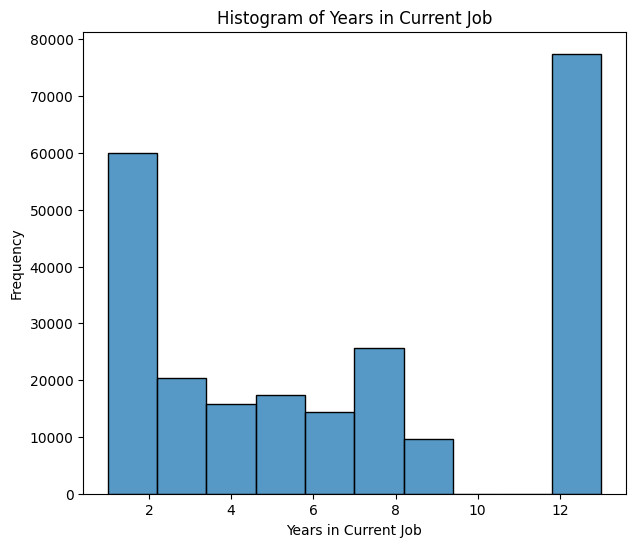

In [32]:
plt.figure(figsize=(7, 6))
sns.histplot(df2['Years in current job'], bins=10, kde=False)
plt.title('Histogram of Years in Current Job')
plt.xlabel('Years in Current Job')
plt.ylabel('Frequency')
plt.show()

In [33]:
df2.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                        0
Years in current job                0
Home Ownership                      0
Annual Income                   61676
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent        0
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 3
Bankruptcies                      505
Tax Liens                          23
dtype: int64

In [34]:
df2['Bankruptcies']=df2['Bankruptcies'].fillna(df2['Bankruptcies'].mode()[0])

In [35]:
df2['Tax Liens']=df2['Tax Liens'].fillna(df2['Tax Liens'].mode()[0])

In [36]:
df2['Annual Income']=df2['Annual Income'].fillna(df2['Annual Income'].mean())

In [37]:
df2['Maximum Open Credit'].fillna(df2['Maximum Open Credit'].mean(), inplace=True)

In [38]:
df2['Purpose'].value_counts()

Purpose
Debt Consolidation      191039
Home Improvements        14087
other                    13291
Other                     9134
Business Loan             4276
Buy a Car                 3138
Medical Bills             2669
Take a Trip               1480
Buy House                 1430
Educational Expenses       253
Name: count, dtype: int64

In [39]:
df2['Purpose']=df2['Purpose'].replace('other','Other')#Incorrect data entry has been corrected.

In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240797 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       240797 non-null  object 
 1   Customer ID                   240797 non-null  object 
 2   Loan Status                   240797 non-null  object 
 3   Current Loan Amount           240797 non-null  int64  
 4   Term                          240797 non-null  object 
 5   Credit Score                  240797 non-null  float64
 6   Years in current job          240797 non-null  int32  
 7   Home Ownership                240797 non-null  object 
 8   Annual Income                 240797 non-null  float64
 9   Purpose                       240797 non-null  object 
 10  Monthly Debt                  240797 non-null  float64
 11  Years of Credit History       240797 non-null  float64
 12  Months since last delinquent  240797 non-null  fl

In [41]:
df2=df2.drop(['Loan ID','Customer ID'],axis=1)

In [42]:
y=df2[['Loan Status']]
x=df2.drop('Loan Status',axis=1)

In [43]:
x.shape

(240797, 16)

In [44]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [45]:
x=pd.get_dummies(x,drop_first=True)

In [46]:
x.head()

,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,...,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip
0,11520,741.0,13,33694.0,584.03,12.3,41.0,10,0,6760,...,False,False,False,False,True,False,False,False,False,False
1,3441,734.0,4,42269.0,1106.04,26.3,0.0,17,0,6262,...,False,False,False,False,False,False,False,False,True,False
2,21029,747.0,13,90126.0,1321.85,28.8,0.0,5,0,20967,...,False,False,False,False,True,False,False,False,False,False
3,18743,747.0,13,38072.0,751.92,26.2,0.0,9,0,22529,...,True,False,False,False,True,False,False,False,False,False
4,11731,746.0,4,50025.0,355.18,11.5,0.0,12,0,17391,...,False,True,False,False,True,False,False,False,False,False


In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [48]:
g=GaussianNB()
b=BernoulliNB()
r=RandomForestClassifier()
gr=GradientBoostingClassifier()

In [49]:
model=g.fit(x_train,y_train)
tahmin=model.predict(x_test)
accuracy_score(tahmin,y_test)

0.4153862126245847

In [50]:
model=b.fit(x_train,y_train)
tahmin1=model.predict(x_test)
accuracy_score(tahmin1,y_test)

0.7330357142857142

In [51]:
model=r.fit(x_train,y_train)
tahmin2=model.predict(x_test)
accuracy_score(tahmin2,y_test)

0.8326827242524917

In [52]:
model=gr.fit(x_train,y_train)
tahmin3=model.predict(x_test)
accuracy_score(tahmin3,y_test)

0.75031146179402

In [53]:
#As a result, an accuracy rate of %83 was achieved in predicting whether individuals should be granted a loan using random forest regression.